In [1]:
# import things

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
%matplotlib inline 

In [2]:
# use data directly from CSSEGISandData/COVID-19

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,989,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,399,400,400,410,410,411,413,414,414,418
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,294,294,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [4]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,4,4,4,5,7,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,663,712,744,792,821,868,873,917,936,956
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,198,215,235,248,257,271,276,282,288,297
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,349,372,384,401,422,438,450,469,490,502
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,183,199,218,228,235,243,247,255,260,270
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,80,80,81,81,82,82,84,85,86,87


In [6]:
cols = confirmed_df.keys()

In [7]:
# get numbers confirmed, deaths and recoveries
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [8]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum) # calculate death per confirmed
    total_recovered.append(recovered_sum)

In [9]:
# get number in numpy. get all data since first row (22 jan)

# get day array
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)

world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

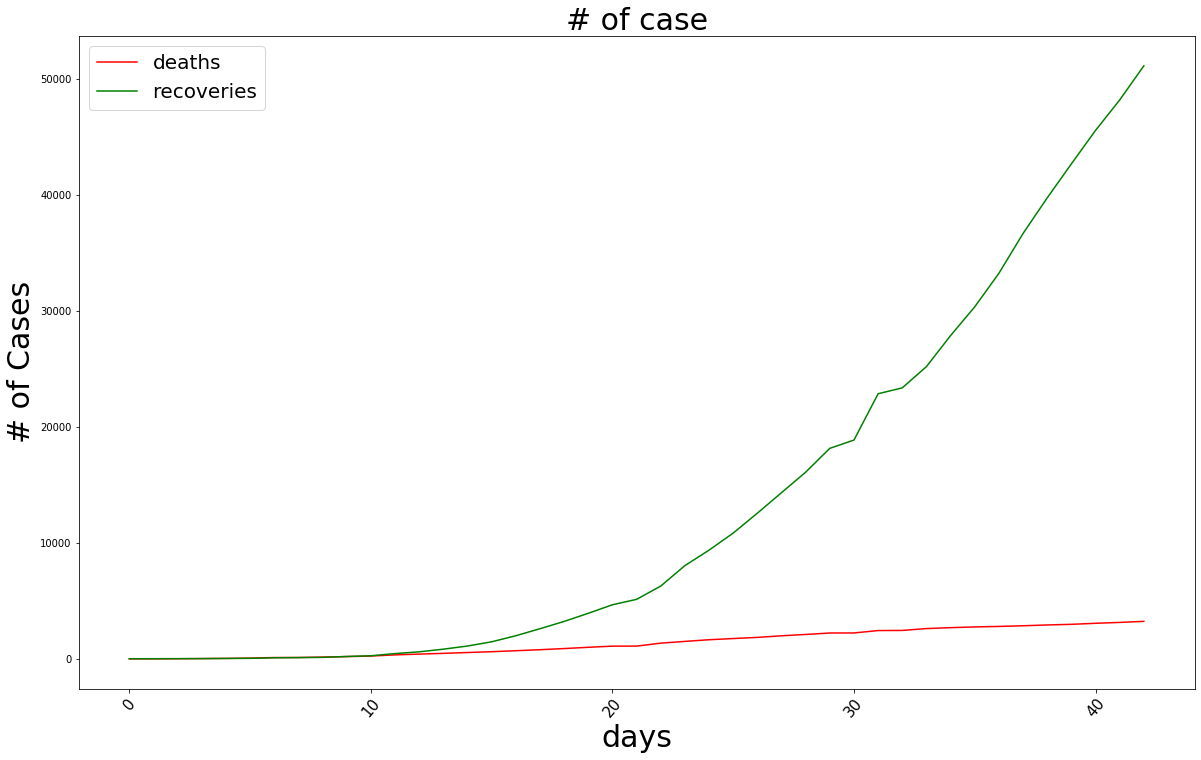

In [10]:
plt.figure(figsize=(20, 12))
plt.plot(total_deaths, color='red')
plt.plot( total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('# of case', size=30)
plt.xlabel('days', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

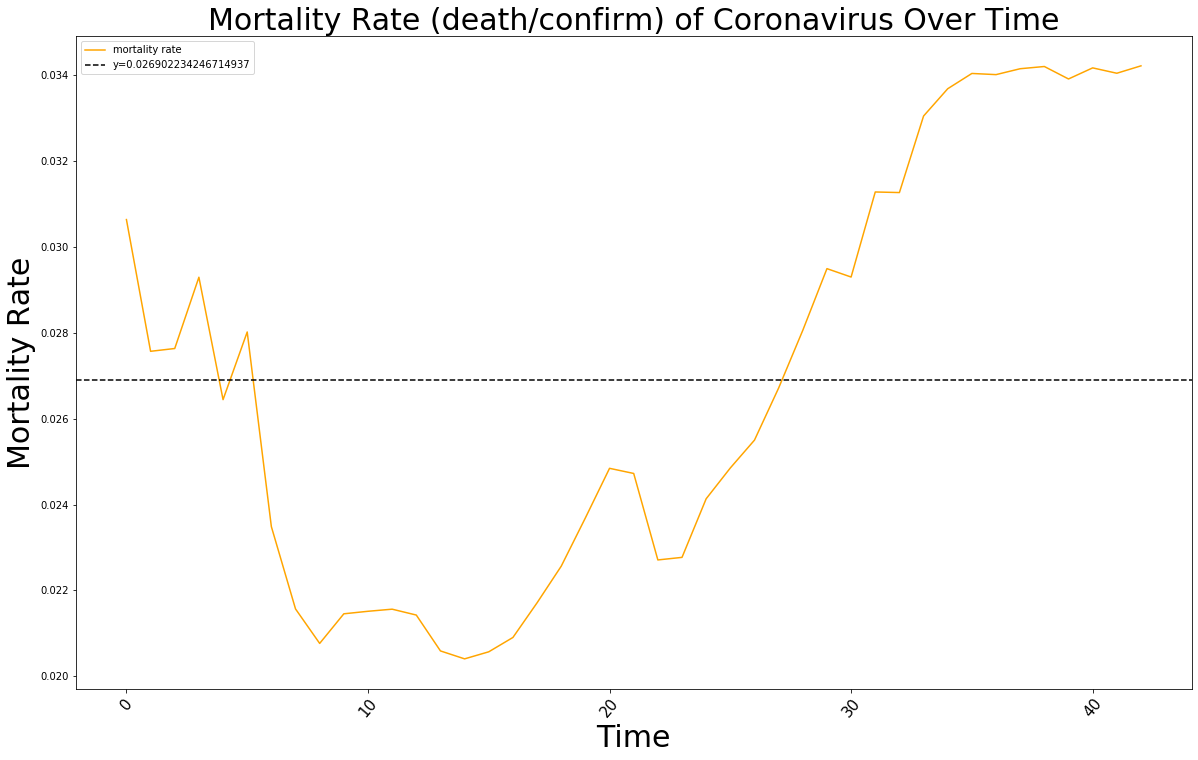

In [11]:
# mortality mean
mean_mortality_rate = np.mean(mortality_rate)

# plot
plt.figure(figsize=(20, 12))
plt.plot(mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate (death/confirm) of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

In [12]:
# get latest confirmed
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

In [13]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [14]:
# get cumulative number case by country
country_confirmed_cases = []
no_cases = [] # remove if no case

for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)

In [15]:
# number of cases per country/region
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Mainland China: 80271 cases
Thailand: 43 cases
Japan: 331 cases
South Korea: 5621 cases
Taiwan: 42 cases
US: 153 cases
Macau: 10 cases
Hong Kong: 105 cases
Singapore: 110 cases
Vietnam: 16 cases
France: 285 cases
Nepal: 1 cases
Malaysia: 50 cases
Canada: 33 cases
Australia: 52 cases
Cambodia: 1 cases
Sri Lanka: 1 cases
Germany: 262 cases
Finland: 6 cases
United Arab Emirates: 27 cases
Philippines: 3 cases
India: 28 cases
Italy: 3089 cases
UK: 85 cases
Russia: 3 cases
Sweden: 35 cases
Spain: 222 cases
Belgium: 23 cases
Others: 706 cases
Egypt: 2 cases
Iran: 2922 cases
Lebanon: 13 cases
Iraq: 35 cases
Oman: 15 cases
Afghanistan: 1 cases
Bahrain: 52 cases
Kuwait: 56 cases
Algeria: 12 cases
Croatia: 10 cases
Switzerland: 90 cases
Austria: 29 cases
Israel: 15 cases
Pakistan: 5 cases
Brazil: 4 cases
Georgia: 3 cases
Greece: 9 cases
North Macedonia: 1 cases
Norway: 56 cases
Romania: 4 cases
Denmark: 10 cases
Estonia: 2 cases
Netherlands: 38 cases
San Marino: 16 cases
Belarus: 6 cases
Iceland:

In [16]:
unique_provinces =  list(confirmed_df['Province/State'].unique())

In [17]:
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)

In [18]:
# number of cases per province/state/city
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Anhui: 990 cases
Beijing: 418 cases
Chongqing: 576 cases
Fujian: 296 cases
Gansu: 91 cases
Guangdong: 1350 cases
Guangxi: 252 cases
Guizhou: 146 cases
Hainan: 168 cases
Hebei: 318 cases
Heilongjiang: 480 cases
Henan: 1272 cases
Hubei: 67332 cases
Hunan: 1018 cases
Inner Mongolia: 75 cases
Jiangsu: 631 cases
Jiangxi: 935 cases
Jilin: 93 cases
Liaoning: 125 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 245 cases
Shandong: 758 cases
Shanghai: 338 cases
Shanxi: 133 cases
Sichuan: 538 cases
Tianjin: 136 cases
Tibet: 1 cases
Xinjiang: 76 cases
Yunnan: 174 cases
Zhejiang: 1213 cases
Taiwan: 42 cases
King County, WA: 31 cases
Cook County, IL: 4 cases
Tempe, AZ: 1 cases
Macau: 10 cases
Hong Kong: 105 cases
Toronto, ON: 19 cases
British Columbia: 12 cases
Los Angeles, CA: 7 cases
New South Wales: 22 cases
Victoria: 10 cases
Queensland: 11 cases
London, ON: 1 cases
Santa Clara, CA: 11 cases
South Australia: 5 cases
Boston, MA: 1 cases
San Benito, CA: 2 cases
Madison, WI: 1 cases
Diamond Prin

In [19]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

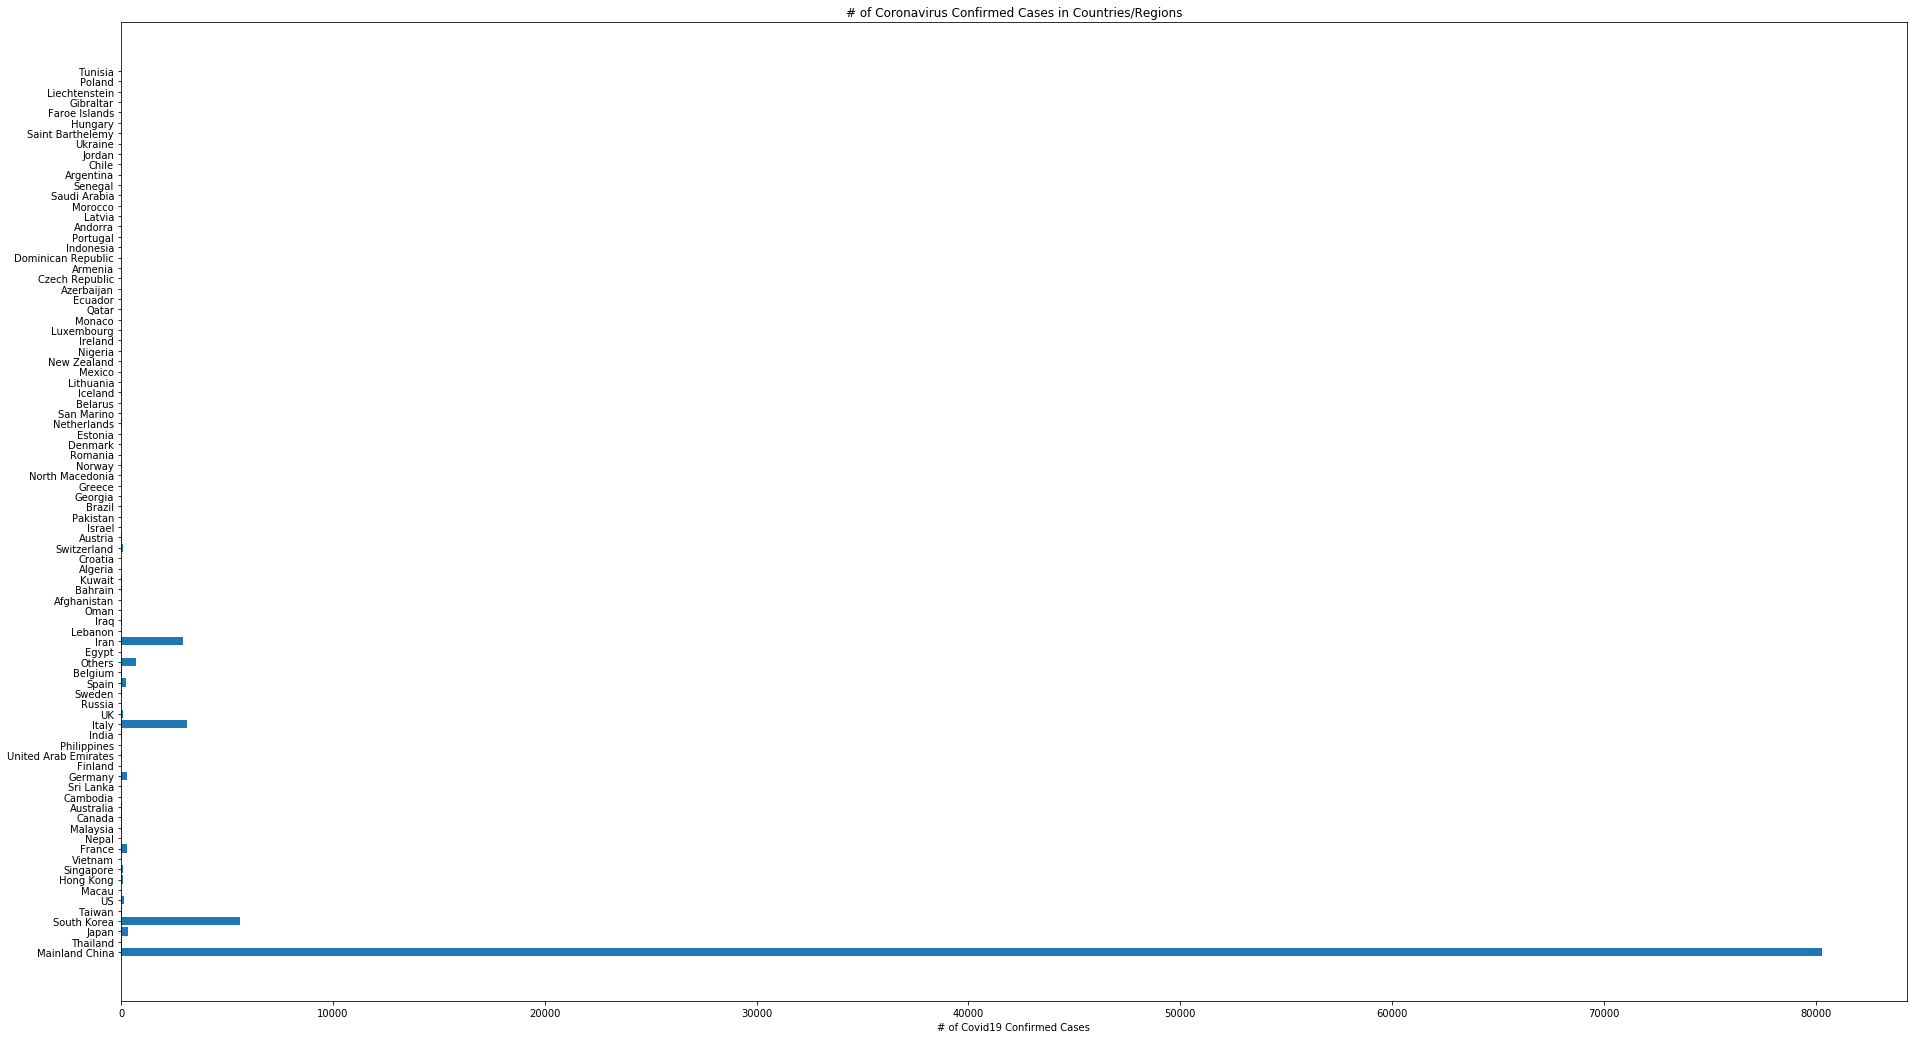

In [20]:
plt.figure(figsize=(32, 18))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('# of Coronavirus Confirmed Cases in Countries/Regions')
plt.xlabel('# of Covid19 Confirmed Cases')
plt.show()

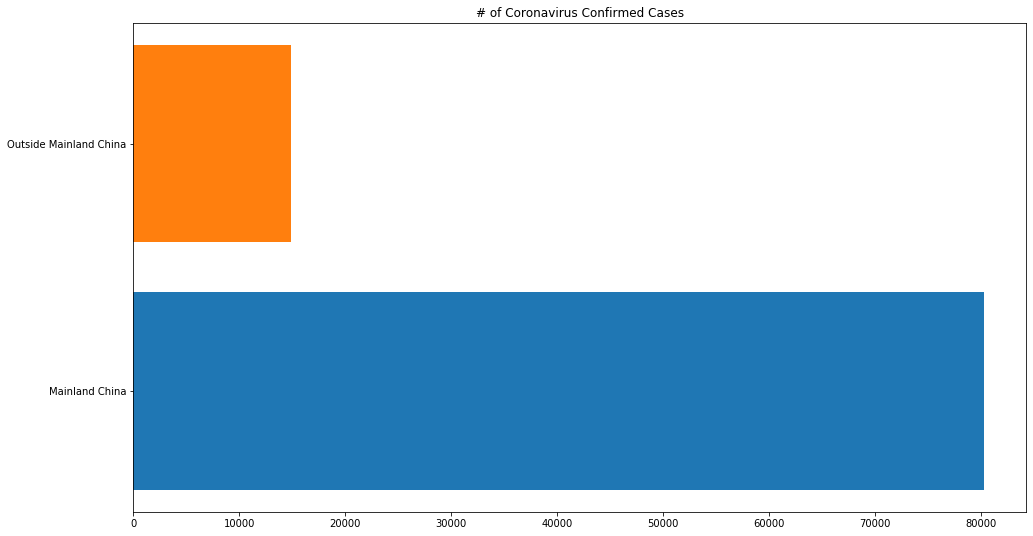

In [21]:
outside_mainland_china_confirmed = np.sum(country_confirmed_cases[1:])
plt.figure(figsize=(16, 9))
plt.barh(unique_countries[0], country_confirmed_cases[0])
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('# of Coronavirus Confirmed Cases')
plt.show()

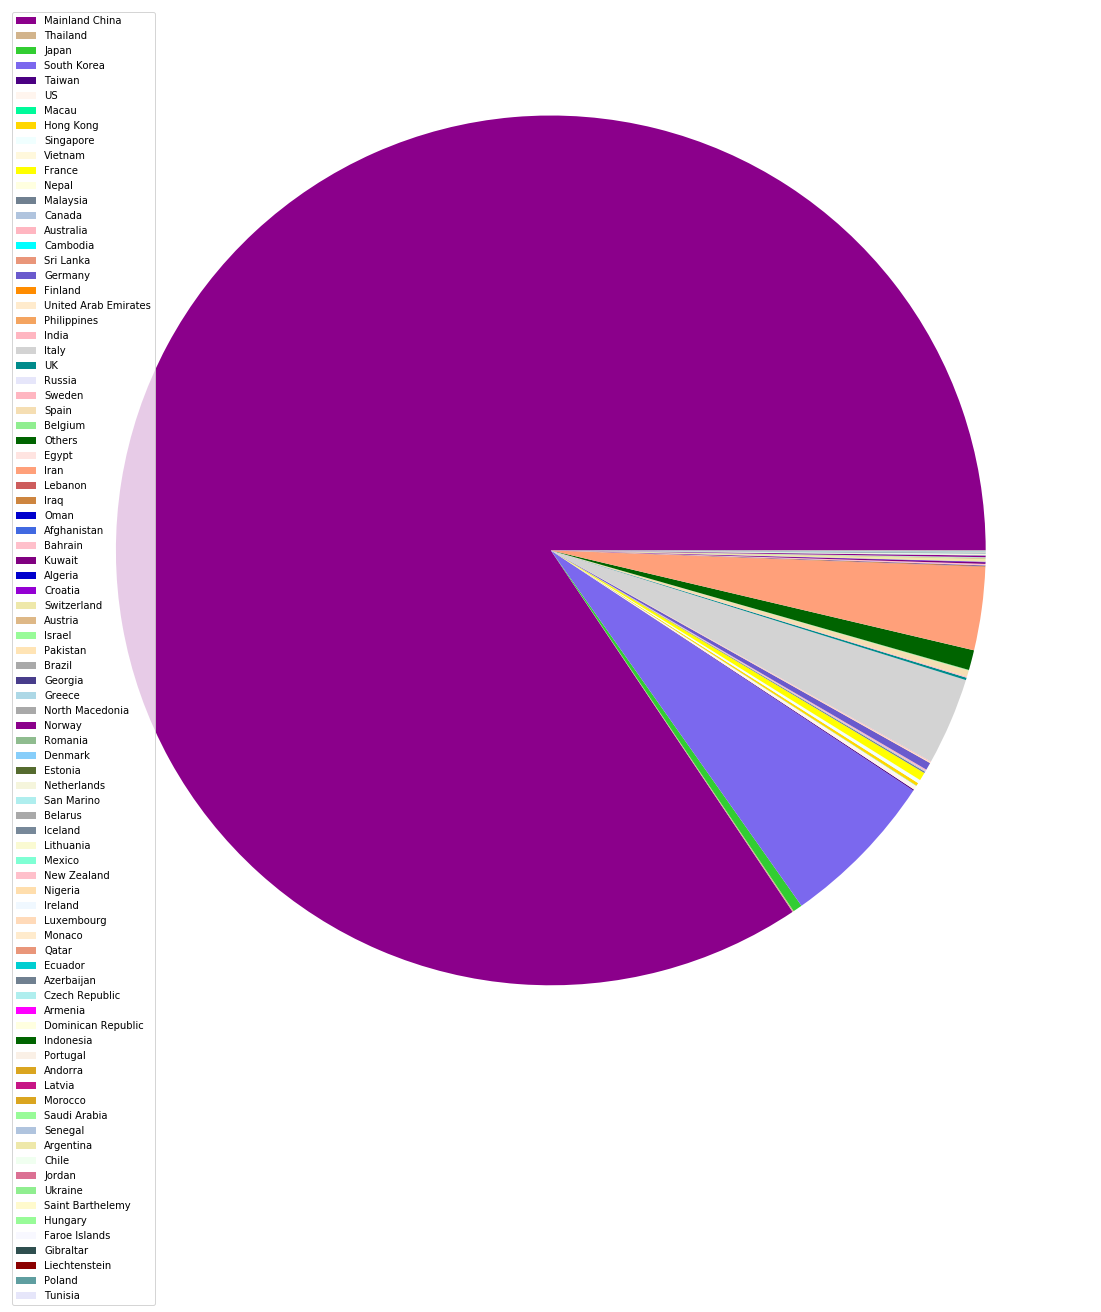

In [22]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()